In [1]:
from car import Car
from road import Road
from simulation import Simulation
import numpy as np
from unittest import mock
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
road = Road(length=1000)
def make_cars(num=10, slowing_chance=0.1, desired_speed=33.333):
    cars = []
    for i in range(num, 0, -1):
        car = Car(road, position=i*33, slowing_chance=0.1, desired_speed=desired_speed) # reverse order required here...
        cars.append(car)
    return cars

In [4]:
def run_sim(discard_steps=60, run_steps=30):
    sim = Simulation(cars=cars, steps=discard_steps)
    sim.start()
    sim.run()

    sim = Simulation(cars=cars, steps=run_steps)

    sim.start()
    positions, speeds = sim.run()
    return positions, speeds

In [5]:
def plot_sim(title):
    plt.xlabel("Time (s)")
    plt.ylabel("Position (m)")
    plt.title(title)
    for i in range(0, len(cars), 2):
        plt.scatter(range(len(positions)), positions[:,i])#, speeds[:,i])
        plt.scatter(range(len(positions)), positions[:,i+1], c='g')#, speeds[:,i+1], c='g')
    plt.subplots_adjust(left=2, right=4)
    print('mean: {} std: {}'.format(speeds[:,0].mean(), speeds[:,0].std()))

In [28]:
n = 30
sc = 0.1
ds = 33.333
cars = make_cars(n, slowing_chance=sc, desired_speed=ds)

In [37]:
#%%capture
positions, speeds = run_sim()

id#90 lead_distance 8, current speed: 0
Braking
id#91 lead_distance 0, current speed: 0
id#92 lead_distance 958, current speed: 24
id#93 lead_distance 68, current speed: 14
Braking
id#94 lead_distance 12, current speed: 12
id#95 lead_distance 28, current speed: 8
id#96 lead_distance 6, current speed: 6
id#97 lead_distance 8, current speed: 4
id#98 lead_distance 79, current speed: 33
id#99 lead_distance 88, current speed: 33
id#100 lead_distance 234, current speed: 31
id#101 lead_distance 109, current speed: 21
id#102 lead_distance 19, current speed: 19
id#103 lead_distance 27, current speed: 19
id#104 lead_distance 881, current speed: 17
Braking
id#105 lead_distance 15, current speed: 15
Braking
id#106 lead_distance 17, current speed: 17
id#107 lead_distance 25, current speed: 13
Braking
id#108 lead_distance 11, current speed: 11
Braking
id#109 lead_distance 29, current speed: 29
id#110 lead_distance 60, current speed: 24
id#111 lead_distance 942, current speed: 32
id#112 lead_distance

TeleportationError: id:119 x:98.0 s:10 is attempting to pass through id:118 x:93.0 s:6.0. Previous Position: 88.0 Lead_dist: 0.0

mean: 32.365193548384745 std: 1.5872554811860349


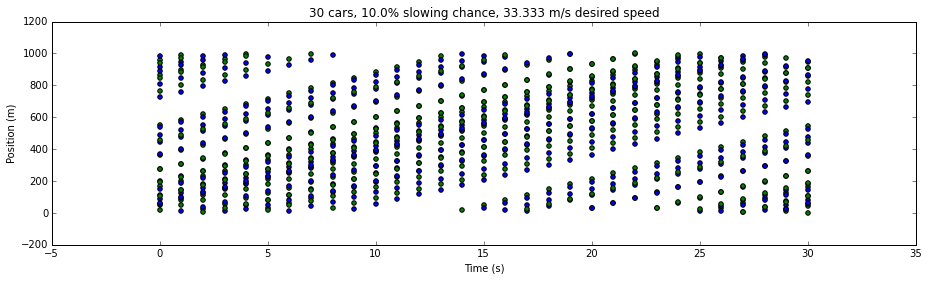

In [38]:
plot_sim('{} cars, {}% slowing chance, {} m/s desired speed'.format(n, sc*100, ds))